<a href="https://colab.research.google.com/github/patriciamediavilla/L1P2/blob/main/PFG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROYECTO FIN DE GRADO**

Patricia Mediavilla

Este Proyecto Fin de Grado tiene como objetivo emplear técnicas de Machine Learning con el fin de conseguir una clasificación de los datos. Se verán distintos algoritmos de clasificación clásica centrándose en el algoritmo SVM, Support Vector Machine.  La clasificación en este proyecto no va a ser únicamente clásica, se introducirán conceptos cuánticos con el fin de implementar un algoritmo de clasificación de QSVM, Quantum Support Vector Machine. Se verá en profundidad cómo funciona este algoritmo y por último se combinan los dos algoritmos, el cásico y el cuántico para mejorar la precisión del modelo.

Esto se va a plicar a un caso de uso en relación con la empresa, en concreto se pordrá ver si un cliente se va a ir o no de la empresa antes de que suceda, esto de llama **churn** que por definición es una métrica que mide la cantidad de cleintes que han dejado de seguir a una empresa

### Librerías

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Cargar BBDDs

In [4]:
train_data=pd.read_csv('ml_case_training_data.csv')
train_out=pd.read_csv('ml_case_training_output.csv')
train_hist=pd.read_csv('ml_case_training_hist_data.csv')

3 conjuntos de datos

- Training -> clientes: con diversa información sobre los clientes y su ciclo de vida

- Hist -> precios: con información sobre cambios de precios

- Output -> churn: que muestran los clientes que se han dado de baja.

Fusionemos los conjuntos de datos de clientes y de bajas por la columna id.

In [5]:
train_data

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,58.995952,f,831.80,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,...,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,...,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,...,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,NaN,...,44.311378,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000
16092,d0a6f71671571ed83b2645d23af6de00,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,...,58.995952,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000
16093,10e6828ddd62cbcf687cb74928c4c2d2,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,NaN,...,40.606701,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935
16094,1cf20fd6206d7678d5bcafd28c53b4db,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,NaN,...,44.311378,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000


In [6]:
train_out

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0
...,...,...
16091,18463073fb097fc0ac5d3e040f356987,0
16092,d0a6f71671571ed83b2645d23af6de00,1
16093,10e6828ddd62cbcf687cb74928c4c2d2,1
16094,1cf20fd6206d7678d5bcafd28c53b4db,0


In [7]:
train_hist

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
...,...,...,...,...,...,...,...,...
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


### Reconociemnto de variables

dentificación identificación de contacto

actividad_nueva categoría de la actividad de la empresa

Campaign_disc_ele código de la campaña de electricidad a la que el cliente se suscribió por última vez

canal_ventas código del canal de ventas

contras_12m de consumo eléctrico de los últimos 12 meses

cons_gas_12m consumo de gas de los últimos 12 meses

cons_last_month consumo eléctrico del último mes

date_activ fecha de activación del contrato

date_end fecha registrada de finalización del contrato

date_first_activ fecha del primer contrato del cliente

date_modif_prod fecha de la última modificación del producto

date_renewal fecha de la próxima renovación del contrato

Forecast_base_bill_ele Línea base prevista de la factura de electricidad para el próximo mes

Forecast_base_bill_year Línea base prevista de la factura de electricidad para el año calendario

Forecast_bill_12m Línea base prevista de la factura de electricidad para 12 meses

Forecast_cons consumo de electricidad previsto para el próximo mes

Forecast_cons_12m consumo eléctrico previsto para los próximos 12 meses

Forecast_cons_year consumo eléctrico previsto para el próximo año natural

Forecast_discount_energy valor previsto del descuento actual

Forecast_meter_rent_12m Factura prevista de alquiler de contadores para los próximos 12 meses

Forecast_price_energy_p1 Precio de energía previsto para el primer período

Forecast_price_energy_p2 Precio de energía previsto para el segundo período

Forecast_price_pow_p1 Precio de energía previsto para el primer período

has_gas indica si clieclient también es cliente de gas

imp_cons consumo pago actual

margin_gross_pow_ele margen bruto en suscripción de energía

margin_net_pow_ele margen neto sobre suscripción de energía

nb_prod_act número de productos y servicios activos

net_margin margen neto total

num_years_antig antigüedad del cliente (en número de años)

código origin_up de la campaña eléctrica a la que el cliente se suscribió por primera vez

potencia suscrita pow_max

precio_fecha fecha de referencia

price_p1_var precio de la energía para el 1er período

price_p2_var precio de la energía para el 2º periodo

price_p3_var precio de la energía para el 3er periodo

price_p1_fix precio de la energía para el 1er período

price_p2_fix precio de la energía para el segundo período

price_p3_fix precio de la energía para el 3er período

batido: el cliente ha sido batido durante los próximos 3 meses

### Preprocesameinto de datos
train y out tienen las mismas observaciones y se realcioann por la columna id, por lo que vamos a juntarlas para tener los datos juntos, tendremos las variables y a continuación los outputs.

Lo hago más abajo al final

In [8]:
train_data_clean = pd.merge(train_data, train_out, on='id')

In [9]:
train_data_clean.isnull().sum()

id                              0
activity_new                 9545
campaign_disc_ele           16096
channel_sales                4218
cons_12m                        0
cons_gas_12m                    0
cons_last_month                 0
date_activ                      0
date_end                        2
date_first_activ            12588
date_modif_prod               157
date_renewal                   40
forecast_base_bill_ele      12588
forecast_base_bill_year     12588
forecast_bill_12m           12588
forecast_cons               12588
forecast_cons_12m               0
forecast_cons_year              0
forecast_discount_energy      126
forecast_meter_rent_12m         0
forecast_price_energy_p1      126
forecast_price_energy_p2      126
forecast_price_pow_p1         126
has_gas                         0
imp_cons                        0
margin_gross_pow_ele           13
margin_net_pow_ele             13
nb_prod_act                     0
net_margin                     15
num_years_anti

Debido a la canidad de NA que encontramos en algunas de las variables, vamos a eliminar aquillas que consideremos que no nos aportan tanta información en relación con los NA.

In [10]:
# Eliminar las variables que no necesitas
columnas_a_eliminar = ['campaign_disc_ele', 'activity_new', 'date_first_activ','forecast_base_bill_ele','forecast_base_bill_year','forecast_bill_12m','forecast_cons']
train_data_clean = train_data_clean.drop(columnas_a_eliminar, axis=1)

In [11]:
#Eliminar NAs
train_data_clean = train_data_clean.dropna(subset=['channel_sales','forecast_price_energy_p1','date_modif_prod','date_renewal','margin_gross_pow_ele','origin_up'])

In [12]:
# Eliminar duplicado
train_data_clean = train_data_clean.drop_duplicates()

In [13]:
train_data_clean

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,...,f,831.80,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
3,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
5,568bb38a1afd7c0fc49c77b3789b59a3,foosdfpfkusacimwkcsosbicdxkicaua,121335,0,12400,2010-04-08,2016-04-08,2010-04-08,2015-04-12,10865.02,...,f,1052.37,-3.18,-3.18,1,823.18,6,lxidpiddsbxsbosboudacockeimpuepw,75.000,0
7,1aa498825382410b098937d65c4ec26d,usilxuppasemubllopkaafesmlibmsdf,8302,0,1998,2011-12-09,2016-12-09,2015-11-01,2015-12-10,796.94,...,f,181.21,33.12,33.12,1,118.89,4,lxidpiddsbxsbosboudacockeimpuepw,13.200,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16090,c49217f16a06263e5381eaba94a67a8b,foosdfpfkusacimwkcsosbicdxkicaua,87146,0,11367,2013-02-08,2016-02-08,2013-02-08,2015-02-09,712.33,...,f,71.81,66.00,66.00,1,87.14,3,lxidpiddsbxsbosboudacockeimpuepw,26.400,0
16091,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0
16092,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1
16093,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1


In [14]:
train_data_clean.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.152000e+04,1.152000e+04,1.152000e+04,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000
mean,2.028563e+05,3.114395e+04,2.055165e+04,2347.888878,1838.863194,1.110937,68.457040,0.137572,0.051785,43.423646,192.952273,23.479753,22.188533,1.348437,220.464149,4.491319,20.017224,0.104427
std,7.022488e+05,1.765701e+05,8.788714e+04,3918.103136,4990.542006,5.426927,74.437892,0.024856,0.049113,3.714054,472.792983,24.465490,29.801867,1.605869,387.334973,1.177204,19.431284,0.305827
min,-1.169570e+05,-3.037000e+03,-6.202600e+04,-16689.260000,-19057.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,-1824.080000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000
25%,6.062750e+03,0.000000e+00,0.000000e+00,535.485000,0.000000,0.000000,16.220000,0.115939,0.000000,40.606701,0.000000,12.820000,12.715000,1.000000,53.507500,4.000000,13.150000,0.000000
50%,1.625800e+04,0.000000e+00,9.480000e+02,1210.185000,389.000000,0.000000,19.390000,0.143076,0.084490,44.311378,47.840000,21.480000,21.480000,1.000000,124.155000,4.000000,13.856000,0.000000
75%,5.336100e+04,0.000000e+00,4.336750e+03,2704.502500,1966.250000,0.000000,131.080000,0.146348,0.098841,44.311378,219.132500,29.760000,29.760000,1.000000,279.845000,6.000000,19.800000,0.000000
max,1.609711e+07,4.154590e+06,4.538720e+06,103801.930000,155432.000000,50.000000,1052.390000,0.273963,0.180691,59.444710,13001.820000,373.430000,373.430000,32.000000,24570.650000,11.000000,360.000000,1.000000


Teneindo en cuenta el contexto de las variables no puede haber valores negativos por lo que vamos a poner el menor valor en lugar de valores negativos, es decir, el 0

In [15]:
# Nombre de las columnas que nno pueden tener negativos
columnas_valor_neg = train_data_clean.select_dtypes(include=['int', 'float']).columns

def replace_negative_with_zero(x):
    return max(0, x)

# Reemplazar los valores negativos por cero en la columna especificada
train_data_clean[columnas_valor_neg] = train_data_clean[columnas_valor_neg].applymap(replace_negative_with_zero)


#### Datos numéricos



In [16]:
train_data_clean.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.152000e+04,1.152000e+04,1.152000e+04,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000
mean,2.028722e+05,3.114459e+04,2.056902e+04,2351.759772,1845.816493,1.110937,68.488148,0.137572,0.051785,43.423656,193.692177,23.997256,23.718095,1.348437,222.767749,4.491319,20.017224,0.104427
std,7.022433e+05,1.765699e+05,8.788054e+04,3911.087990,4981.301976,5.426927,74.367119,0.024856,0.049113,3.713930,471.792452,22.265569,21.511938,1.605869,380.131681,1.177204,19.431284,0.305827
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,6.062750e+03,0.000000e+00,0.000000e+00,535.485000,0.000000,0.000000,16.220000,0.115939,0.000000,40.606701,0.000000,12.820000,12.715000,1.000000,53.507500,4.000000,13.150000,0.000000
50%,1.625800e+04,0.000000e+00,9.480000e+02,1210.185000,389.000000,0.000000,19.390000,0.143076,0.084490,44.311378,47.840000,21.480000,21.480000,1.000000,124.155000,4.000000,13.856000,0.000000
75%,5.336100e+04,0.000000e+00,4.336750e+03,2704.502500,1966.250000,0.000000,131.080000,0.146348,0.098841,44.311378,219.132500,29.760000,29.760000,1.000000,279.845000,6.000000,19.800000,0.000000
max,1.609711e+07,4.154590e+06,4.538720e+06,103801.930000,155432.000000,50.000000,1052.390000,0.273963,0.180691,59.444710,13001.820000,373.430000,373.430000,32.000000,24570.650000,11.000000,360.000000,1.000000


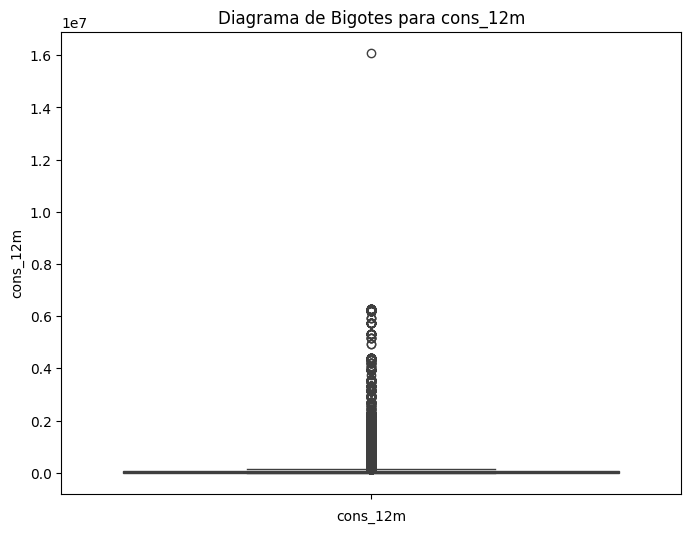

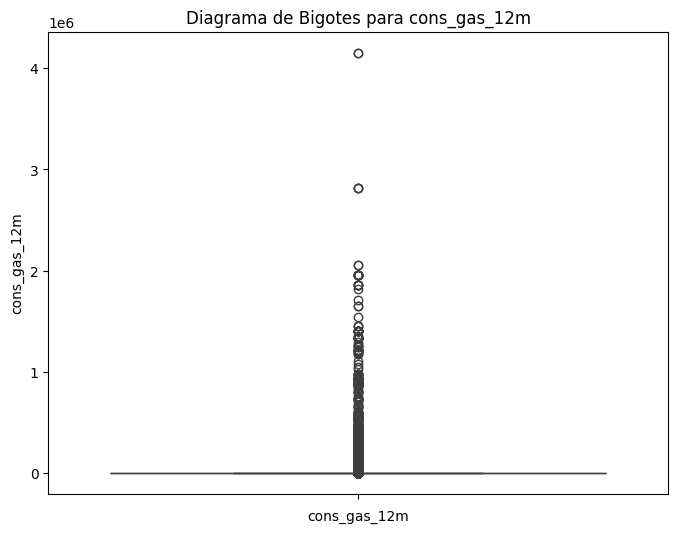

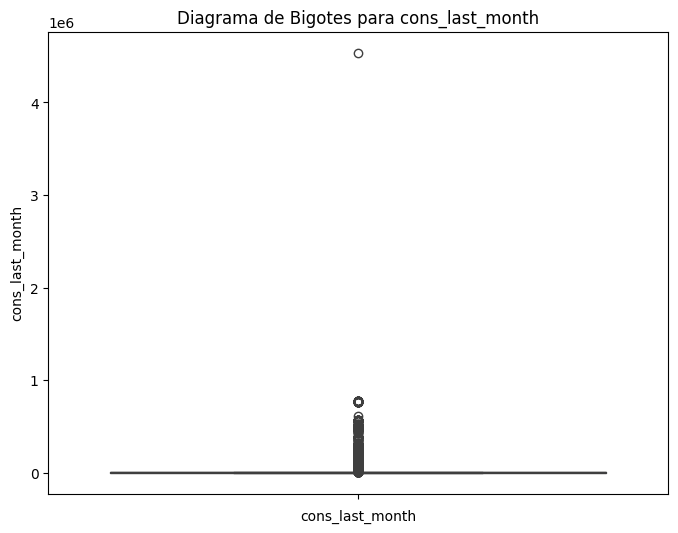

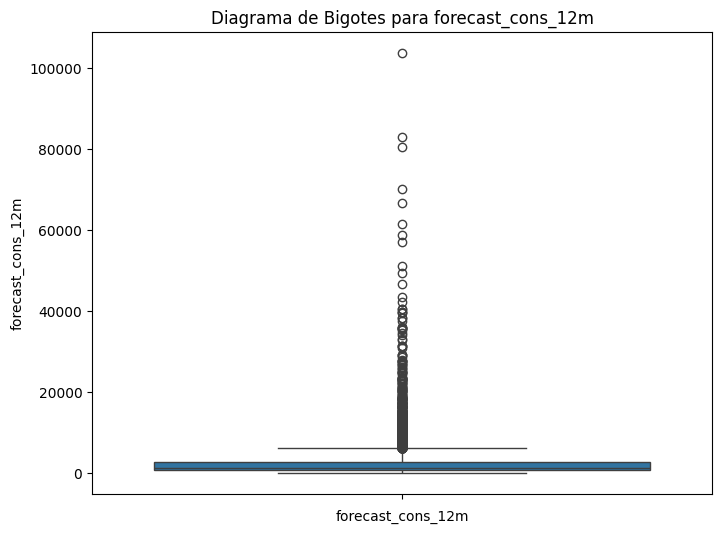

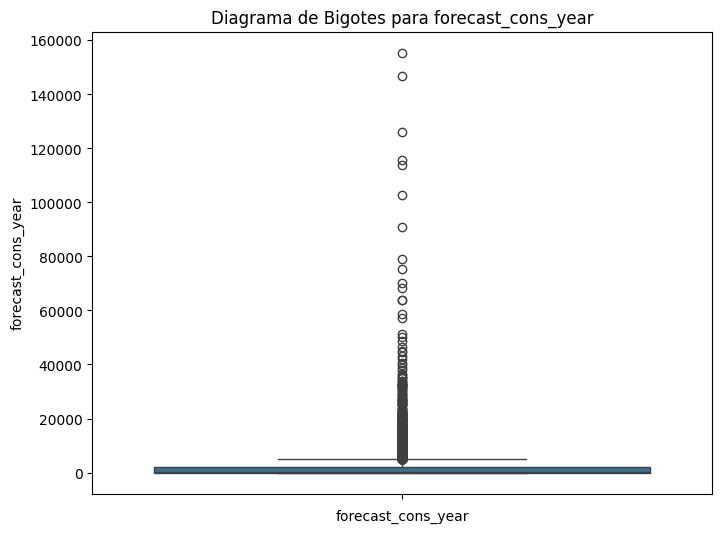

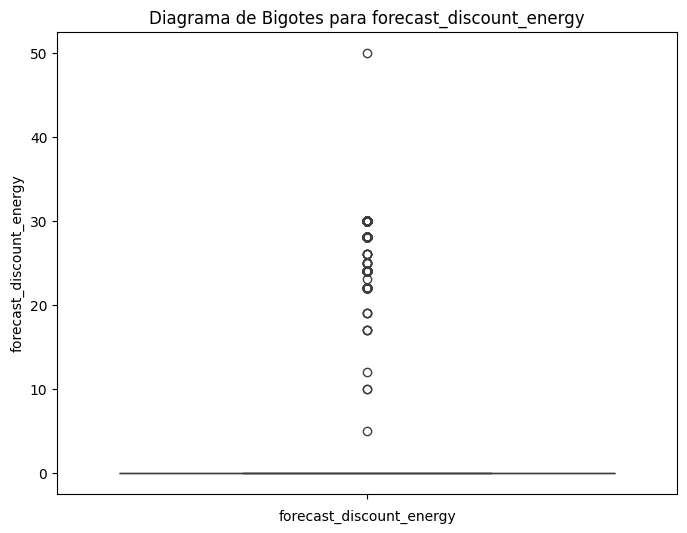

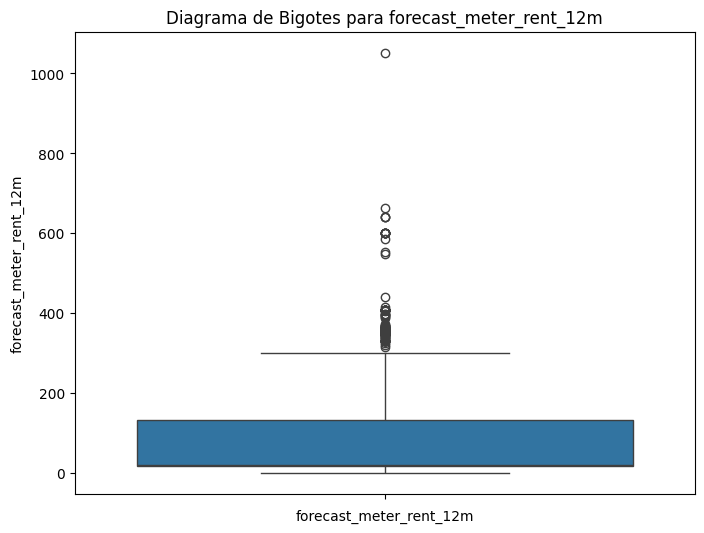

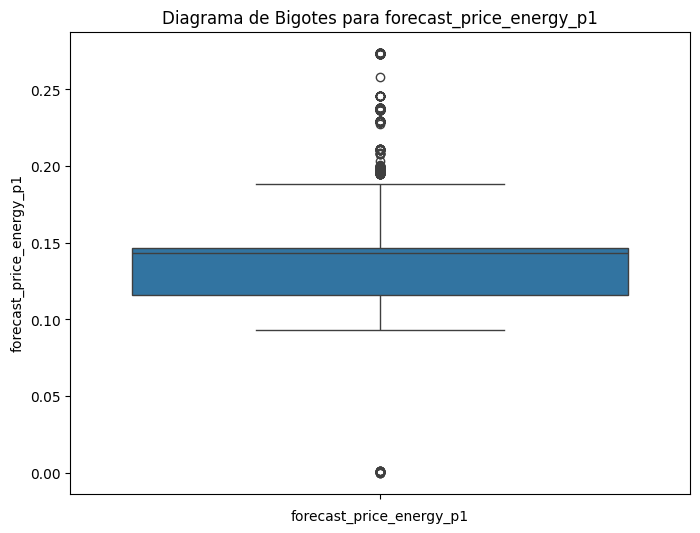

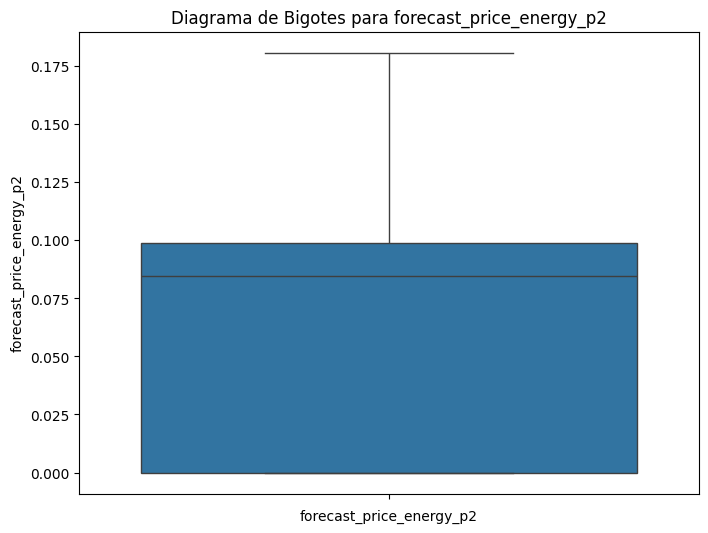

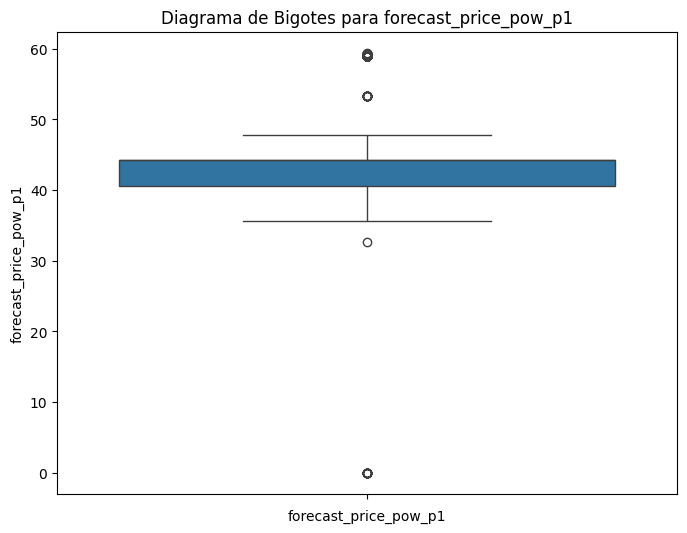

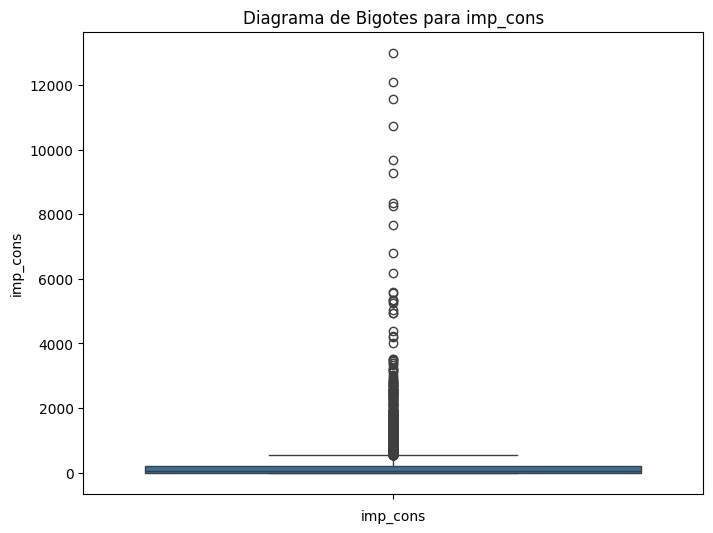

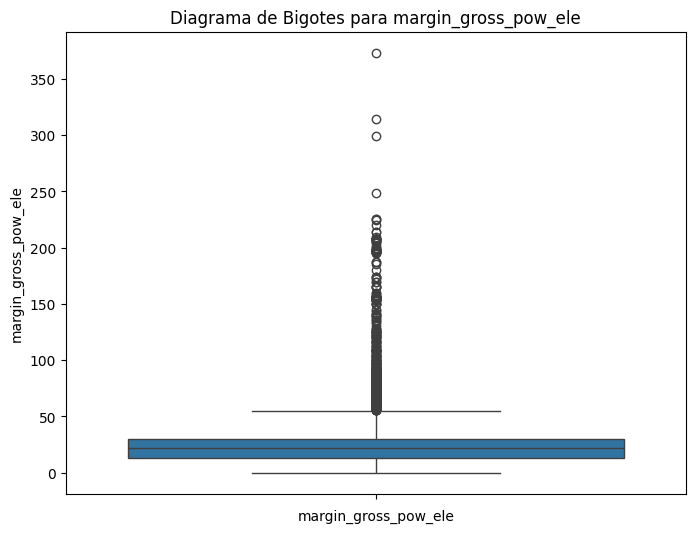

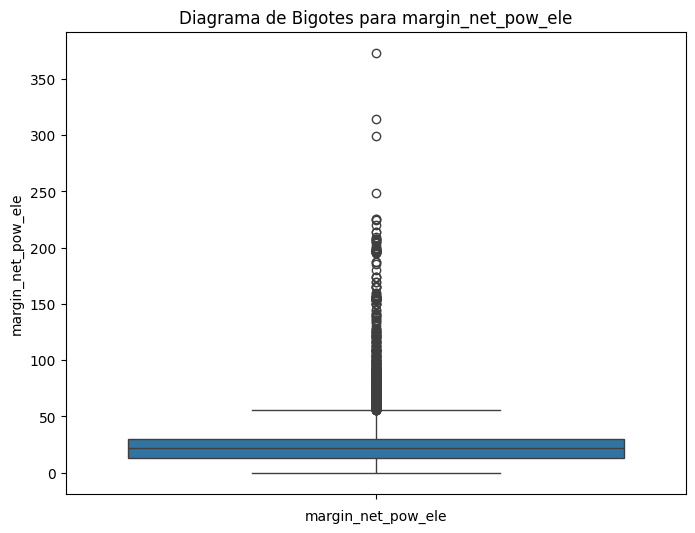

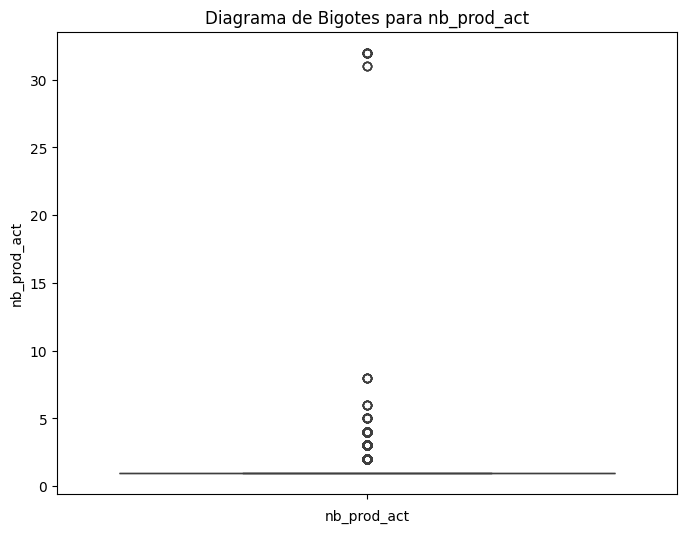

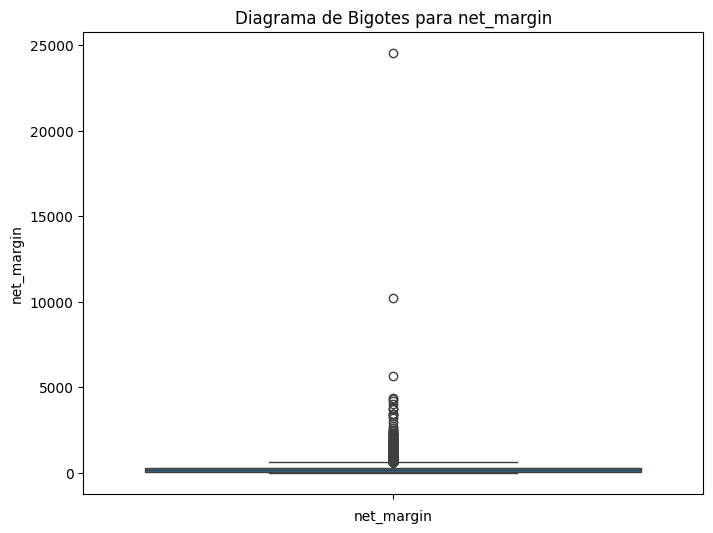

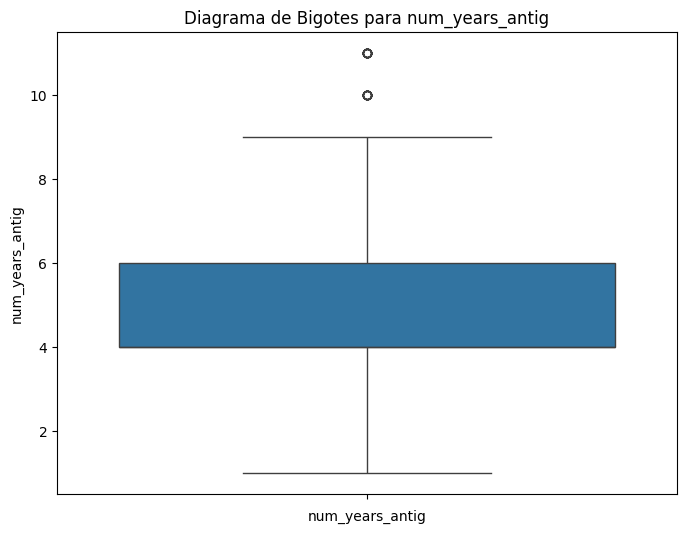

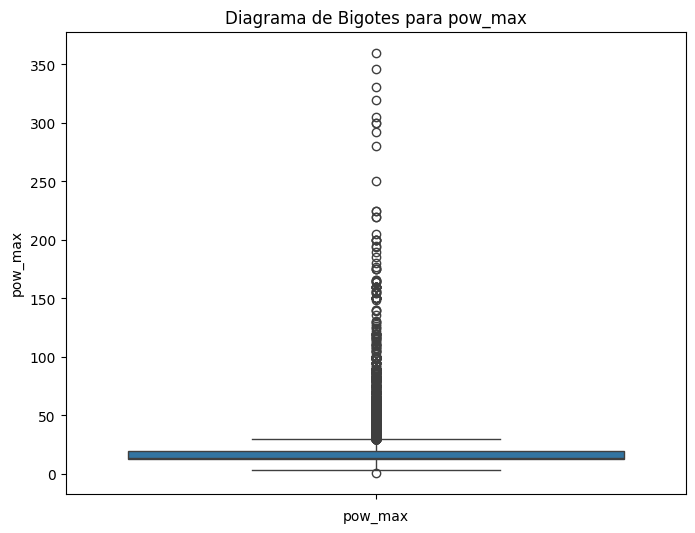

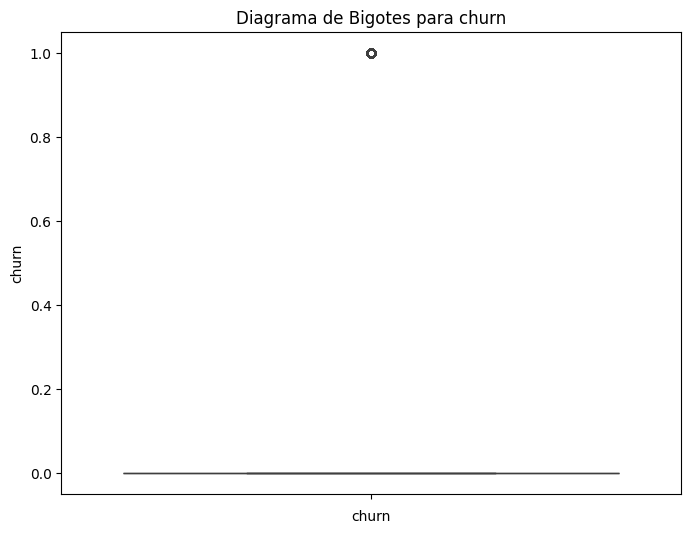

In [17]:
# Crear un diagrama de bigotes para todas las variables numéricas
for columna in columnas_valor_neg:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=train_data_clean[columna])
    plt.xlabel(columna)
    plt.title(f'Diagrama de Bigotes para {columna}')
    plt.show()


#Ver si hay que eliminar outliers

#### Datos no numéricos

In [18]:
# Seleccionar solo las columnas que no son numéricas
columnas_no_numericas = ['channel_sales','origin_up','has_gas']

# Iterar sobre las columnas no numéricas y mostrar los valores únicos
for columna in columnas_no_numericas:
    recuento_valores = train_data_clean[columna].value_counts()
    print(f"Recuento de valores en la columna '{columna}':")
    print(recuento_valores)
    print()

Recuento de valores en la columna 'channel_sales':
foosdfpfkusacimwkcsosbicdxkicaua    7113
lmkebamcaaclubfxadlmueccxoimlema    2038
usilxuppasemubllopkaafesmlibmsdf    1412
ewpakwlliwisiwduibdlfmalxowmwpci     943
sddiedcslfslkckwlfkdpoeeailfpeds      10
epumfxlbckeskwekxbiuasklxalciiuu       4
Name: channel_sales, dtype: int64

Recuento de valores en la columna 'origin_up':
lxidpiddsbxsbosboudacockeimpuepw    6879
kamkkxfxxuwbdslkwifmmcsiusiuosws    2857
ldkssxwpmemidmecebumciepifcamkci    1783
usapbepcfoloekilkwsdiboslwaxobdp       1
Name: origin_up, dtype: int64

Recuento de valores en la columna 'has_gas':
f    9495
t    2025
Name: has_gas, dtype: int64



Hacer una varibale que sea una fecha menos la otra para tener la duracion del cleinte en la empresa

date_activ fecha de activación del contrato
date_end fecha registrada de finalización del contrato

In [19]:
#Pasamos las fechas a formato fecha
train_data_clean['date_activ'] = pd.to_datetime(train_data_clean['date_activ'])
train_data_clean['date_end'] = pd.to_datetime(train_data_clean['date_end'])
train_data_clean['date_modif_prod'] = pd.to_datetime(train_data_clean['date_modif_prod'])
train_data_clean['date_renewal'] = pd.to_datetime(train_data_clean['date_renewal'])


# Calcular la diferencia en días entre las dos fechas
train_data_clean['total_days'] = (train_data_clean['date_end'] - train_data_clean['date_activ']).dt.days

## Modelo SVM con las columnas numéricas

Sin tener en cuanta cuantas observaciones hay de cada caso.

In [20]:
columnas_numericas = train_data_clean.select_dtypes(include=['int', 'float']).columns
bbdd_numerica = train_data_clean[columnas_numericas]

Sería el  momento de igualar observaciones

In [129]:
conteo = bbdd_numerica['churn'].value_counts()
conteo

0    10317
1     1203
Name: churn, dtype: int64

In [21]:
bbdd_numerica = bbdd_numerica.sample(n=100)

In [22]:
X = bbdd_numerica.drop('churn', axis=1)
Y = bbdd_numerica['churn']

sería el momento de escalar los datos.
Y, O de ahcer un PCA o un random forest

In [23]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#SVM lineal
lineal = svm.SVC(kernel='linear')
lineal.fit(X_train, Y_train)
y_pred_lineal = lineal.predict(X_test)
accuracy_lineal = accuracy_score(Y_test, y_pred_lineal)

# SVM radial
radial = svm.SVC(kernel='rbf')
radial.fit(X_train, Y_train)
y_pred_radial = radial.predict(X_test)
accuracy_radial = accuracy_score(Y_test, y_pred_radial)

# SVM de kernel polinómico
pol = svm.SVC(kernel='poly', degree=3)
pol.fit(X_train, Y_train)
y_pred_pol = pol.predict(X_test)
accuracy_pol = accuracy_score(Y_test, y_pred_pol)

# SVM sigmoidal
sig = svm.SVC(kernel='sigmoid')
sig.fit(X_train, Y_train)
y_pred_sig = sig.predict(X_test)
accuracy_sig = accuracy_score(Y_test, y_pred_sig)

precisions = [['SVM lineal', accuracy_lineal],
              ['SVM radial', accuracy_radial],
              ['SVM polinómico', accuracy_pol],
              ['SVM sigmoidal', accuracy_sig]]

tabla = pd.DataFrame(precisions, columns=['Modelo SVM', 'Precisión'], index=None)
print(tabla.to_string(index=False).format("{:<20} {:>10.4f}"))